# EDA for ---
* DeptRatio & MonthlyIncome: 
* Mean, Median or Mode:
* Scaling, Non-Scaling:
* 90dayslater:

다양한 결측치, 이상치 처리방법을 고민해보고, 다양한 데이터셋을 만들어보기 위한 아이디어를 얻기 위한 과정이었음.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Data load

In [2]:
train_df = pd.read_csv("C:/python/fintech_credit/cs-training.csv")
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
Unnamed: 0                              150000 non-null int64
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(8)
memory usage: 13.7 MB


In [3]:
test_df = pd.read_csv("C:/python/fintech_credit/cs-test.csv")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 12 columns):
Unnamed: 0                              101503 non-null int64
SeriousDlqin2yrs                        0 non-null float64
RevolvingUtilizationOfUnsecuredLines    101503 non-null float64
age                                     101503 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    101503 non-null int64
DebtRatio                               101503 non-null float64
MonthlyIncome                           81400 non-null float64
NumberOfOpenCreditLinesAndLoans         101503 non-null int64
NumberOfTimes90DaysLate                 101503 non-null int64
NumberRealEstateLoansOrLines            101503 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    101503 non-null int64
NumberOfDependents                      98877 non-null float64
dtypes: float64(5), int64(7)
memory usage: 9.3 MB


### 2.1 'Dependents', Median
#### Median

In [4]:
train_df['NumberOfDependents'].fillna(train_df['NumberOfDependents'].median(), inplace=True)

##### Check Null

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
Unnamed: 0                              150000 non-null int64
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      150000 non-null float64
dtypes: float64(4), int64(8)
memory usage: 13.7 MB


### 2.2 DebtRatio & MonthlyIncome
#### 2.2.1 Monthly Income NA

- Monthly Income이 NAN 값인 데이터와, NAN이 아닌 데이터와의 통계치 비교. 비교를 통해 입력 값에 문제 발견
- 데이터 입력 오류라고 판단하여 row 삭제
- 삭제된 데이터: 29731개
##### Train

In [6]:
train_df[(train_df['MonthlyIncome'].isnull()==True)]['DebtRatio'].mean()

1673.3965557835256

In [7]:
train_df[(train_df['MonthlyIncome'].isnull()==False)]['DebtRatio'].mean()

26.598777445397424

In [8]:
train_df[(train_df['MonthlyIncome'].isnull()==True)]['DebtRatio'].describe()

count     29731.000000
mean       1673.396556
std        4248.372895
min           0.000000
25%         123.000000
50%        1159.000000
75%        2382.000000
max      329664.000000
Name: DebtRatio, dtype: float64

In [9]:
train_df[(train_df['MonthlyIncome'].isnull()==False)]['DebtRatio'].describe()

count    120269.000000
mean         26.598777
std         424.446457
min           0.000000
25%           0.143388
50%           0.296023
75%           0.482559
max       61106.500000
Name: DebtRatio, dtype: float64

##### Test
* 문제는 Test set에도 같은 데이터 입력 오류가 존재. 따로 모델링하는 것도 가능할 것. 프로젝트에 주어진 시간 고려하여 결정.

In [10]:
test_df[(test_df['MonthlyIncome'].isnull()==True)]['DebtRatio'].mean()

1622.574143162712

In [11]:
test_df[(test_df['MonthlyIncome'].isnull()==False)]['DebtRatio'].mean()

28.828500973502855

In [12]:
test_df[(test_df['MonthlyIncome'].isnull()==True)]['DebtRatio'].describe()

count     20103.000000
mean       1622.574143
std        2832.472770
min           0.000000
25%         120.000000
50%        1146.000000
75%        2379.500000
max      268326.000000
Name: DebtRatio, dtype: float64

In [13]:
test_df[(test_df['MonthlyIncome'].isnull()==False)]['DebtRatio'].describe()

count     81400.000000
mean         28.828501
std         916.109297
min           0.000000
25%           0.141927
50%           0.294997
75%           0.481263
max      202990.000000
Name: DebtRatio, dtype: float64

#### 2.2.2 MonthlyIncome 이 Null인 row 제거

In [14]:
train_df = train_df.dropna()

##### 모든 결측치 제거 후 120269개의 데이터 남음

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120269 entries, 0 to 149999
Data columns (total 12 columns):
Unnamed: 0                              120269 non-null int64
SeriousDlqin2yrs                        120269 non-null int64
RevolvingUtilizationOfUnsecuredLines    120269 non-null float64
age                                     120269 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    120269 non-null int64
DebtRatio                               120269 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         120269 non-null int64
NumberOfTimes90DaysLate                 120269 non-null int64
NumberRealEstateLoansOrLines            120269 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    120269 non-null int64
NumberOfDependents                      120269 non-null float64
dtypes: float64(4), int64(8)
memory usage: 11.9 MB


#### 2.2.3 DebtRatio 값의 정상치 분포 확인

Text(0.5, 1.0, 'Histogram-DebtRatio >= 10')

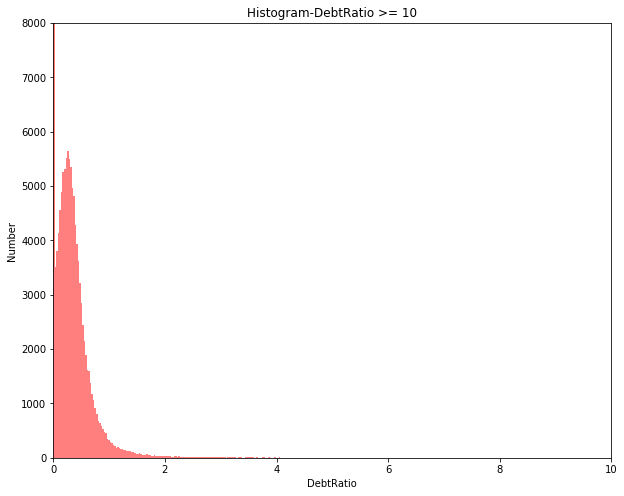

In [20]:
plt.figure(figsize=(10,8))
plt.hist(train_df[train_df['MonthlyIncome'] >=  10]['DebtRatio'], bins=10000, color='r', alpha=0.5)
plt.xlim(0, 10)
plt.ylim(0,8000)
plt.xlabel('DebtRatio')
plt.ylabel('Number')
plt.title('Histogram-DebtRatio >= 10')

분포에서 떨어진 데이터들은 데이터 입력오류로 판단하였고, 모델의 성능을 낮출 것. 데이터의 손실을 조금 감안 하더라고 입력오류에 대한 전처리를 해주는 방향으로

데이터셋을 만들어보기로 결정